In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import pearsonr
from scipy.sparse import csr_matrix

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

<h2>Correlated data in nature</h2>

You are given an array grains giving the width and length of samples of grain. You suspect that width and length will be correlated. To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

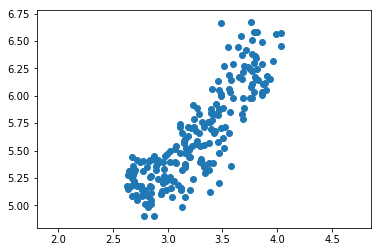

0.8604149377143467


In [4]:
grains = np.array(pd.read_csv('data/seeds-width-vs-length.csv', header=None))

# Perform the necessary imports
#import matplotlib.pyplot as plt
#from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

<h2>Decorrelating the grain measurements with PCA</h2>

You observed in the previous exercise that the width and length measurements of the grain are correlated. Now, you'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

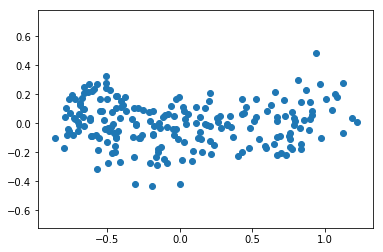

7.474656899453042e-17


In [6]:
# Import PCA
#from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

<h2>The first principal component</h2>

The first principal component of the data is the direction in which the data varies the most. In this exercise, your job is to use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

The array grains gives the length and width of the grain samples. PyPlot (plt) and PCA have already been imported for you.

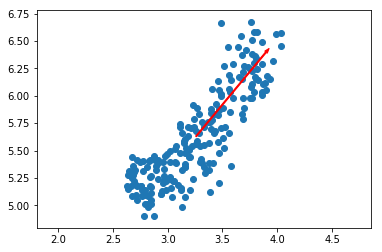

In [7]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

<h2>Variance of the PCA features</h2>

The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out. As before, samples is a 2D array, where each row represents a fish. You'll need to standardize the features first.

In [10]:
df = pd.read_csv('data/fish.csv', header=None)
samples = df.iloc[:, 1:]
#print(samples[:5])
#print(type(samples))
#print(samples.shape)
species = np.array(df.iloc[:, :1].values.tolist()).flatten()
#print(species[:5])
#print(species.ndim)

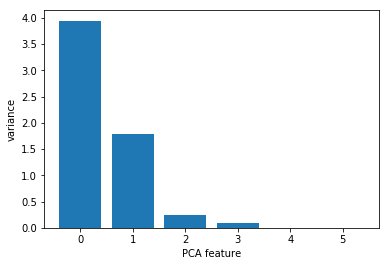

In [11]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Great work! It looks like PCA features 0 and 1 have significant variance.

<h2>Dimension reduction of the fish measurements</h2>

In a previous exercise, you saw that 2 was a reasonable choice for the "intrinsic dimension" of the fish measurements. Now use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

The fish measurements have already been scaled for you, and are available as scaled_samples.

In [15]:
# Import PCA
#from sklearn.decomposition import PCA

scaled_samples = np.array([[-0.50109735, -0.36878558, -0.34323399, -0.23781518,  1.0032125 ,
         0.25373964],
       [-0.37434344, -0.29750241, -0.26893461, -0.14634781,  1.15869615,
         0.44376493],
       [-0.24230812, -0.30641281, -0.25242364, -0.15397009,  1.13926069,
         1.0613471 ],
       [-0.18157187, -0.09256329, -0.04603648,  0.02896467,  0.96434159,
         0.20623332],
       [-0.00464454, -0.0747425 , -0.04603648,  0.06707608,  0.8282934 ,
         1.0613471 ],
       [ 0.04816959, -0.04801131,  0.01175193,  0.12043205,  1.08095432,
         0.63379021],
       [ 0.18020491, -0.04801131,  0.01175193,  0.10518748,  1.26559115,
         1.15635974],
       [-0.11027279,  0.02327186,  0.03651839,  0.14329889,  0.78942248,
         0.25373964],
       [ 0.04816959,  0.02327186,  0.03651839,  0.15092117,  1.14897842,
         0.44376493],
       [ 0.18020491,  0.10346543,  0.09430679,  0.23476627,  1.09067205,
         0.39625861],
       [ 0.11418725,  0.09455503,  0.11907325,  0.23476627,  1.10038978,
         0.58628389],
       [ 0.18020491,  0.12128622,  0.11907325,  0.23476627,  1.12954296,
         0.20623332],
       [ 0.18020491,  0.1569278 ,  0.16035069,  0.25001083,  0.94490613,
        -0.41134885],
       [ 0.44427556,  0.18365899,  0.20162812,  0.31098909,  1.1781316 ,
         0.49127125],
       [ 0.44427556,  0.18365899,  0.20162812,  0.31098909,  1.30446206,
         1.01384078],
       [ 0.7083462 ,  0.27276296,  0.28418298,  0.39483418,  1.04208341,
         0.44376493],
       [ 0.7083462 ,  0.27276296,  0.28418298,  0.41007875,  1.04208341,
         0.30124596],
       [ 0.47068262,  0.31731494,  0.32546042,  0.41770103,  1.20728478,
         0.20623332],
       [ 0.57631088,  0.32622533,  0.32546042,  0.42532331,  0.90603522,
         0.91882813],
       [ 0.3782579 ,  0.35295652,  0.36673785,  0.48630156,  0.99349477,
         0.58628389],
       [ 0.66873561,  0.36186692,  0.36673785,  0.46343472,  1.23643797,
         0.39625861],
       [ 0.49708969,  0.37077732,  0.40801528,  0.50154612,  1.07123659,
         0.20623332],
       [ 0.65553208,  0.3975085 ,  0.44929271,  0.57014666,  0.97405931,
         1.0613471 ],
       [ 0.7083462 ,  0.4064189 ,  0.44929271,  0.56252438,  1.16841387,
         0.44376493],
       [ 0.77436387,  0.3975085 ,  0.44929271,  0.5930135 ,  1.15869615,
         0.91882813],
       [ 0.76116033,  0.4153293 ,  0.44929271,  0.57014666,  1.18784933,
         1.01384078],
       [ 0.74531609,  0.47770207,  0.53184758,  0.63874719,  1.13926069,
         0.58628389],
       [ 1.10445217,  0.48661247,  0.53184758,  0.64636947,  1.21700251,
         0.96633446],
       [ 1.50055814,  0.54898524,  0.61440245,  0.72259229,  1.5959939 ,
         1.25137238],
       [ 1.28930162,  0.68264119,  0.73823474,  0.83692651,  1.2461557 ,
         0.68129653],
       [ 1.38172635,  0.68264119,  0.73823474,  0.82930423,  1.26559115,
         0.68129653],
       [ 1.30250516,  0.78956594,  0.82078961,  0.92839389,  1.29474434,
         0.96633446],
       [ 1.43454048,  0.8964907 ,  0.94462191,  0.97412758,  1.21700251,
         0.87132181],
       [ 1.36852282,  0.94995308,  0.94462191,  1.01986127,  0.95462386,
         0.39625861],
       [-1.03452005, -1.2865564 , -1.27610397, -1.28969003, -0.24065667,
         0.53877757],
       [-0.95793956, -0.96578213, -0.93762902, -0.97717649, -0.19206803,
         0.49127125],
       [-0.93417321, -0.87667817, -0.8880961 , -0.90857596, -0.17263258,
         0.39625861],
       [-0.91040685, -0.8143054 , -0.80554124, -0.83235314, -0.26980986,
         0.68129653],
       [-0.82326354, -0.77866381, -0.78903027, -0.83235314, -0.0074312 ,
         1.5364103 ],
       [-1.14014831, -0.74302223, -0.74775283, -0.78661945,  0.03143971,
         0.87132181],
       [-0.8496706 , -0.73411183, -0.72298637, -0.76375261, -0.13376167,
         0.87132181],
       [-0.82326354, -0.70738064, -0.7064754 , -0.71801892, -0.22122122,
         0.49127125],
       [-0.74404234, -0.61827668, -0.62392054, -0.6417961 , -0.44472896,
         1.10885342],
       [-0.75724587, -0.60936628, -0.62392054, -0.67228523, -0.0754553 ,
         0.82381549],
       [-0.71763528, -0.60936628, -0.5826431 , -0.59606241, -0.02686666,
         1.0613471 ],
       [-0.77044941, -0.5648143 , -0.5826431 , -0.61892926, -0.18235031,
         0.20623332],
       [-0.71763528, -0.5559039 , -0.5826431 , -0.61892926, -0.24065667,
         1.10885342],
       [-0.69386892, -0.47571034, -0.4588108 , -0.45123907, -0.03658439,
         0.58628389],
       [-0.71499457, -0.47571034, -0.50834372, -0.48935047, -0.21150349,
         0.34875228],
       [-0.61200702, -0.46679994, -0.50008824, -0.48172819, -0.04630212,
         1.20386606],
       [-0.66482115, -0.33314399, -0.35974497, -0.39788309, -0.26009213,
         0.53877757],
       [-0.37434344, -0.29750241, -0.29370107, -0.29879344,  0.22579427,
         1.20386606],
       [-0.42187616, -0.20839845, -0.21114621, -0.19208149, -0.0074312 ,
         1.2988787 ],
       [-0.11027279,  0.19256939,  0.17686166,  0.14329889, -0.09489075,
         1.15635974],
       [-1.12245558, -1.60733067, -1.63108989, -1.70129323, -1.16384082,
        -1.50399423],
       [-1.12034301, -1.5449579 , -1.57330149, -1.64031498, -1.07638127,
        -1.36147526],
       [-1.12166336, -1.5360475 , -1.565046  , -1.64031498, -1.28045356,
        -1.40898159],
       [-1.11453346, -1.50931631, -1.53202405, -1.60982586, -0.95005081,
        -0.64888045],
       [-1.11426939, -1.48258512, -1.51551308, -1.57933673, -1.09581673,
        -1.2189563 ],
       [-1.11717416, -1.47367473, -1.5072576 , -1.56409217, -1.20271174,
        -1.26646262],
       [-1.11374125, -1.42912274, -1.46598016, -1.52598076, -1.086099  ,
        -1.45648791],
       [-1.11400532, -1.42912274, -1.46598016, -1.52598076, -1.086099  ,
        -1.88404479],
       [-1.11426939, -1.42021235, -1.44946919, -1.51835848, -1.10553446,
        -1.97905744],
       [-1.10793169, -1.41130195, -1.43295822, -1.50311391, -1.21242946,
        -1.17144998],
       [-1.10476284, -1.39348116, -1.41644724, -1.49549163, -0.97920399,
        -1.64651319],
       [-1.10793169, -1.35783957, -1.36691432, -1.47262479, -1.12496991,
        -1.78903215],
       [-1.08812639, -1.25982521, -1.259593  , -1.36591285, -0.89174444,
         0.34875228],
       [-1.08759825, -1.20636284, -1.20180459, -1.28969003, -0.96948627,
        -0.60137413],
       [-0.61200702,  0.23712137,  0.22639458,  0.12805433, -1.17355855,
        -1.50399423],
       [-0.34793638,  0.38859811,  0.36673785,  0.35672277, -1.2610181 ,
        -0.88641206],
       [-0.34793638,  0.47770207,  0.44929271,  0.43294559, -1.24158265,
        -0.74389309],
       [-0.34793638,  0.6648204 ,  0.6391689 ,  0.5091684 , -1.19299401,
        -1.31396894],
       [-0.00464454,  0.72719317,  0.69695731,  0.56252438, -0.97920399,
        -0.74389309],
       [-0.22910458,  0.77174515,  0.73823474,  0.60063578, -1.21242946,
        -1.50399423],
       [ 0.06401383,  1.128161  ,  1.0684542 ,  0.94363845, -1.17355855,
        -1.59900687],
       [ 0.20661198,  1.128161  ,  1.0684542 ,  0.94363845, -1.27073583,
        -1.45648791],
       [ 0.28583317,  1.1370714 ,  1.10973164,  0.9665053 , -1.07638127,
        -0.79139942],
       [ 0.18020491,  1.30636893,  1.27484137,  1.13419549, -1.31932447,
        -1.26646262],
       [ 0.35713225,  1.41329369,  1.35739623,  1.18755146, -1.17355855,
        -1.36147526],
       [ 0.89319566,  1.55586003,  1.52250596,  1.3781085 , -1.27073583,
        -1.12394366],
       [ 1.36852282,  1.8677239 ,  1.82795897,  1.67537748, -1.1541231 ,
        -0.79139942],
       [ 2.16073475,  2.19740857,  2.18294489,  2.02600243, -0.98892172,
        -0.55386781],
       [ 3.08498201,  2.55382442,  2.51316435,  2.35376053, -1.27073583,
        -1.55150055],
       [ 2.95294669,  2.55382442,  2.51316435,  2.35376053, -1.27073583,
        -1.55150055],
       [ 3.21701733,  2.82113631,  2.79385089,  2.65865179, -1.18327628,
        -0.88641206]])

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)


(85, 2)


<h2>A tf-idf word-frequency array</h2>

In this exercise, you'll create a tf-idf word frequency array for a toy collection of documents. For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has fit() and transform() methods like other sklearn objects.

In [17]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

# Import TfidfVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
# This is a word-frequency array in csr_matrix format.
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


<h2>Clustering Wikipedia</h2>

You saw in the video that TruncatedSVD is able to perform PCA on sparse arrays in csr_matrix format, such as word-frequency arrays. Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia. In this exercise, build the pipeline. In the next exercise, you'll apply it to the word-frequency array of some Wikipedia articles.

Create a Pipeline object consisting of a TruncatedSVD followed by KMeans. (This time, we've precomputed the word-frequency matrix for you, so there's no need for a TfidfVectorizer).

In [24]:
df = pd.read_csv('data/wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)

In [21]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

In [26]:
# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

    label                                        article
59      0                                    Adam Levine
57      0                          Red Hot Chili Peppers
56      0                                       Skrillex
55      0                                  Black Sabbath
54      0                                 Arctic Monkeys
53      0                                   Stevie Nicks
52      0                                     The Wanted
51      0                                     Nate Ruess
50      0                                   Chad Kroeger
58      0                                         Sepsis
40      1                                    Tonsillitis
41      1                                    Hepatitis B
42      1                                    Doxycycline
43      1                                       Leukemia
47      1                                          Fever
45      1                                    Hepatitis C
46      1                      